## Simulation Assignment
### Puneet Mangla (CS17BTECH11029)

Please install following libararies
- ```pip3 install --user matplotlib```
- ```pip3 install --user pandas```
- ```pip3 install --user numpy```
- ```pip3 install --user scipy```
- ```pip3 install --user seaborn```
- ```pip3 install --user statsmodels```

In [16]:
# !pip3 install --user seaborn
# !pip3 install --user statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time

### Q1: Generating continuous uniform random numbers between [0,1]

I use following **linear congurential generator** for generating uniform distribution. 

Given $x_0$ as seed, the $n^{th}$ sample, $x_n$ is caluclated as:

$x_n = a \cdot x_{n-1}$ mod $m$

Here I took $a=23$ and $m=10^{8}+1$

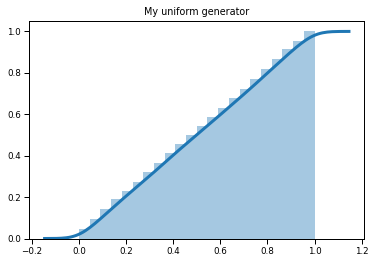

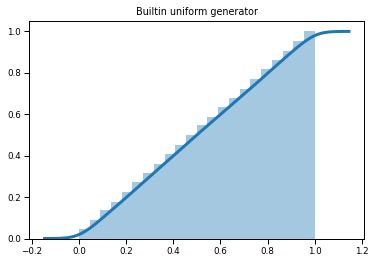

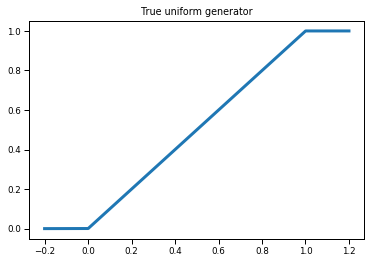

In [62]:
kwargs = {'cumulative': True}  # draw cumulative plots
class Uniform: # Linear congurential generator
    def __init__(self,seed):
        self.a = 23
        self.m = 100000001
        self.seed = seed
    def sample(self):
        self.seed = (self.seed*self.a)%self.m
        return self.seed/float(self.m)
    
gen  = Uniform(47) # provide random seed

x_pseudo = [gen.sample() for _ in range(10000)]
sns.distplot(x_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My uniform generator')
plt.show()
# plt.clf()

x_builtin = np.random.uniform(size=10000) # numpy uniform distribution
sns.distplot(x_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin uniform generator')
plt.show()

def true_cdf(x):
    if x>=0 and x<=1:
        return x
    elif x<0:
        return 0
    else:
        return 1

x = np.linspace(-0.2,1.2 , 10000,endpoint = True) 
cdf = [true_cdf(i) for i in x]
sns.lineplot(x, cdf)
plt.title('True uniform generator')
plt.show()

### Q2 (a) : Exponential distribution from uniform distribution

using **Inverse trandform sampling**. 

Given CDF $F_X(x)$ of desired distribution,
- random variable $U$ be form uniform distribution (0,1).
- find the inverse of the desired CDF, $F^{-1}_X(x)$
- compute $X = F^{-1}_X(U)$. The computed random variable $X$ has distribution $F_X(x)$.

For exponential disribution,

$F_X(x)=1-e^{-\lambda \cdot x}$

$X = F^{-1}_X(U) = -\frac{ln(1-U)}{\lambda}$

Since $1-U$ follows uniform distribution, we can replace by $U$, For $\lambda=1$

$X =-ln(U)$


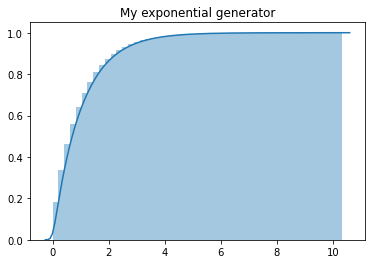

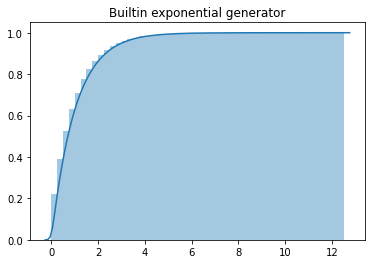

In [18]:
def uniform_to_exp(x): # inverse transform
    return -np.log(x)
unif_pseudo = [gen.sample() for _ in range(100000)]
exp_pseudo = uniform_to_exp(unif_pseudo)
sns.distplot(exp_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My exponential generator')
plt.show()
# plt.clf()

exp_builtin = np.random.exponential(size=100000)
sns.distplot(exp_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin exponential generator')
plt.show()


### Q2 (b) : Gaussian distribution from uniform distribution
using **Box muller transform**. 

Suppose $U_1$ and $U_2$ are independent samples chosen from the uniform distribution on the unit interval (0, 1). Let

  $Z_0 = \sqrt{−2ln(U_1)} \cdot cos(2\pi U_2)$
  
  $Z_1 = \sqrt{−2ln(U_1)} \cdot sin(2\pi U_2)$

Then $Z_0$ and $Z_1$ are independent random variables with a standard normal distribution. 

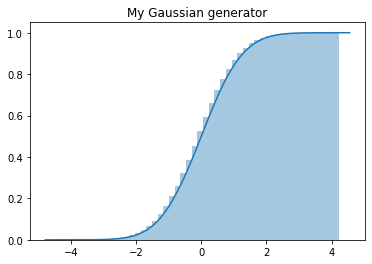

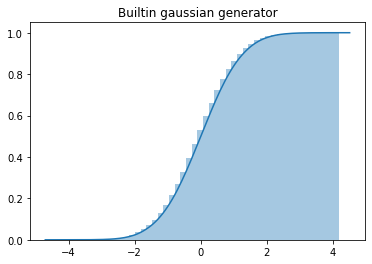

In [22]:
gen2 = Uniform(27)
def uniform_to_gauss(x1,x2):
    return np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2))
unif_pseudo1 = [gen.sample() for _ in range(100000)] # two independent sampples from uniform distribution
unif_pseudo2 = [gen2.sample() for _ in range(100000)] 
gauss_pseudo = uniform_to_gauss(unif_pseudo1,unif_pseudo2)
sns.distplot(gauss_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My Gaussian generator')
plt.show()
# plt.clf()

gauss_builtin = np.random.normal(size=100000)
sns.distplot(gauss_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin gaussian generator')
plt.show()

### Q2 (c) : Pareto distribution from uniform distribution
using Inverse transform sampling
For pareto disribution for scale=1 and shape=2,

$F_X(x)=1-\frac{1}{x^2}$

$X = F^{-1}_X(U) = \frac{1}{(1-U)^{1/a}}$

Since $1-U$ follows uniform distribution, we can replace by $U$, thus

$X = \frac{1}{U^{1/a}}$


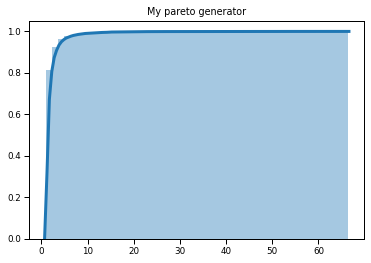

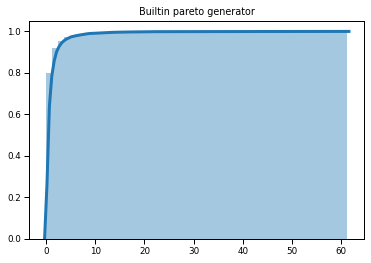

In [58]:
def uniform_to_pareto(x,a): # inverse transform
    return 1./np.power(x,1./a)
unif_pseudo = [gen.sample() for _ in range(10000)]
pareto_pseudo = uniform_to_pareto(unif_pseudo,a=2)
sns.distplot(pareto_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My pareto generator')
plt.show()
# plt.clf()

pareto_builtin = np.random.pareto(a=2,size=10000)
sns.distplot(pareto_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin pareto generator')
plt.show()

### Q2 (d) : Lognormal distribution from uniform distribution

Let $Z$ be from normal distribution and 

$X = e^Z$ then $X$ follows lognormal distribution


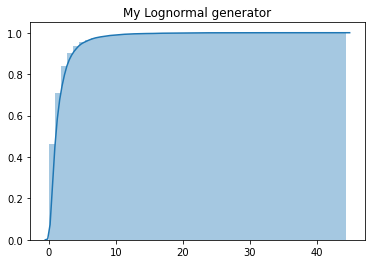

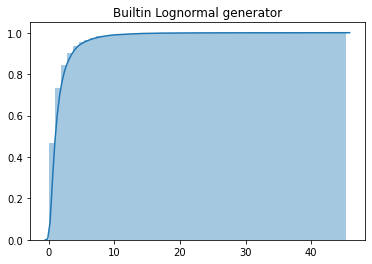

In [32]:
def uniform_to_lognormal(x1,x2):
    return np.exp(np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2)))

unif_pseudo1 = [gen.sample() for _ in range(10000)]
unif_pseudo2 = [gen2.sample() for _ in range(10000)]
lognormal_pseudo = uniform_to_lognormal(unif_pseudo1,unif_pseudo2)
sns.distplot(lognormal_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My Lognormal generator')
plt.show()
# plt.clf()

lognormal_builtin = np.random.lognormal(size=10000)
sns.distplot(lognormal_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin Lognormal generator')
plt.show()

### Q3 (a) : Chisqaure distribution from uniform distribution
Let $Z_1$ and $Z_2$ are two independent normal distributions, then for two degrees of freedom, chisquare random variable $X$ is given as

$X = Z_1^2 + Z_2^2$


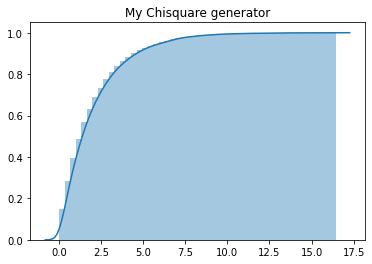

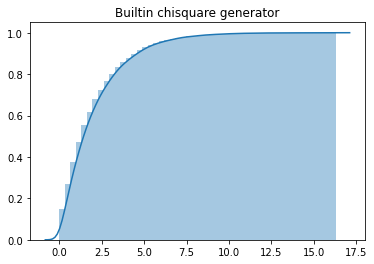

In [39]:
def uniform_to_chisquare(x1,x2):
    r1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2))
    r2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*np.asarray(x2))
    return np.power(r1,2) + np.power(r2,2)

unif_pseudo1 = [gen.sample() for _ in range(10000)]
unif_pseudo2 = [gen2.sample() for _ in range(10000)]
chisquare_pseudo = uniform_to_chisquare(unif_pseudo1,unif_pseudo2)
sns.distplot(chisquare_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My Chisquare generator')
plt.show()
# plt.clf()

chisquare_builtin = np.random.chisquare(2,size=10000)
sns.distplot(chisquare_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin chisquare generator')
plt.show()

### Q3 (b) : non-central chisqaure distribution from uniform distribution
Let $Z_1$ and $Z_2$ are two independent normal distributions with mean $\mu_1$ and $\mu_2$, then for two degrees of freedom, non-central chisquare random variable $X$ is given as

$X = Z_1^2 + Z_2^2$

with non-centrality parameter $\lambda = \mu_1^2 + \mu_2^2$


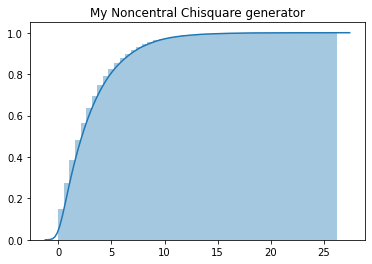

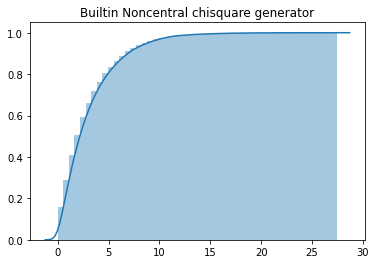

In [40]:
def uniform_to_nc_chisquare(x1,x2):
    r1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2)) + 1 # normal dist with mean 1
    r2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*np.asarray(x2)) 
    return np.power(r1,2) + np.power(r2,2)

unif_pseudo1 = [gen.sample() for _ in range(10000)]
unif_pseudo2 = [gen2.sample() for _ in range(10000)]
nc_chisquare_pseudo = uniform_to_nc_chisquare(unif_pseudo1,unif_pseudo2)
sns.distplot(nc_chisquare_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My Noncentral Chisquare generator')
plt.show()
# plt.clf()

nc_chisquare_builtin = np.random.noncentral_chisquare(2,1,size=10000)
sns.distplot(nc_chisquare_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin Noncentral chisquare generator')
plt.show()

### Q3 (c) : Rayleigh distribution from uniform distribution
For rayleigh distribution
$F_X(x)=1-e^{\frac{-x^2}{2\sigma^2}}$

$X = F^{-1}_X(U) = \sigma \cdot \sqrt{-2 \cdot ln(U)}$



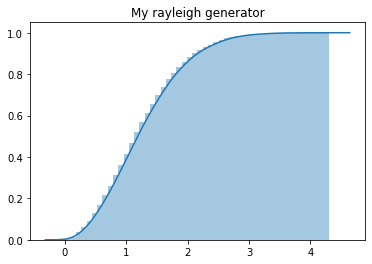

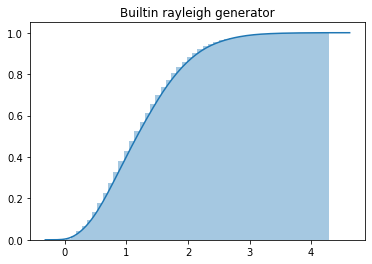

In [41]:
def uniform_to_rayleigh(x,a):
    return a*np.sqrt(-2*np.log(x))
unif_pseudo = [gen.sample() for _ in range(10000)]
rayleigh_pseudo = uniform_to_rayleigh(unif_pseudo,a=1)
sns.distplot(rayleigh_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My rayleigh generator')
plt.show()
# plt.clf()

rayleigh_builtin = np.random.rayleigh(size=10000)
sns.distplot(rayleigh_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin rayleigh generator')
plt.show()

### Q3 (d) : Rice distribution from uniform distribution
$R \sim Rice(\vert \nu \vert, \sigma)$ has rice distribution if $R = \sqrt{X^2 + Y^2}$ where $X \sim \mathcal{N}(\nu cos\theta, \sigma^2)$  and $Y \sim \mathcal{N}(\nu sin\theta, \sigma^2)$ are statistically independent normal random variables and $\theta$ is any real number. I took $\theta=0$


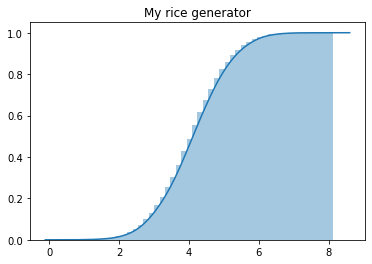

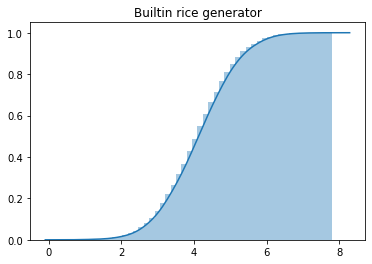

In [43]:
def uniform_to_rice(x1,x2,nu,sigma):
    r1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2))
    r2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*np.asarray(x2))
    r1 = nu + r1*sigma
    r2 = r2*sigma
    return np.sqrt(np.power(r1,2) + np.power(r2,2))

unif_pseudo1 = [gen.sample() for _ in range(10000)]
unif_pseudo2 = [gen2.sample() for _ in range(10000)]
rice_pseudo = uniform_to_rice(unif_pseudo1,unif_pseudo2, nu=4, sigma=1)
sns.distplot(rice_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My rice generator')
plt.show()
# plt.clf()

from scipy.stats import rice  
rice_builtin = rice .rvs(b=4, scale=1, size=10000) 
sns.distplot(rice_builtin, hist_kws=kwargs, kde_kws=kwargs)
plt.title('Builtin rice generator')
plt.show()

### Q4 (c) : Inequality
Let $\mu$ and $\sigma$ be mean and standard deviation of random variable $X$

**Markov** : $P(X\geq a \cdot \mu) \leq \frac{1}{a}$

**Chernov** : $P(X\geq (1+a)\cdot \mu) \leq e^{\frac{-a^2}{(2+a) \cdot \mu}}$

**Chebyshev** : $P(X\geq \mu + a \cdot \sigma) \leq \frac{1}{a^2}$


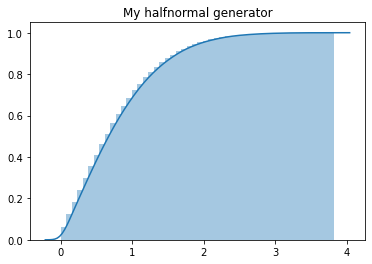

       True    Markov  Chebyshev    Cherov
2  0.046151  0.398942   0.251460  0.596611
3  0.002425  0.265962   0.074934  0.278916
4  0.000000  0.199471   0.035439  0.117997
5  0.000000  0.159577   0.020579  0.047570


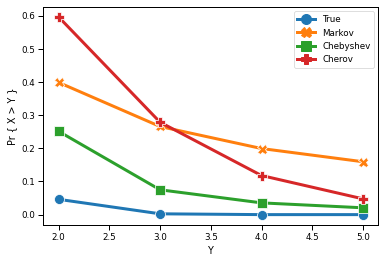

In [44]:
import pandas as pd

def uniform_to_halfnormal(x1,x2):
    r = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*np.asarray(x2))
    return r[r>0] # filter positive numbers only
unif_pseudo1 = [gen.sample() for _ in range(100000)]
unif_pseudo2 = [gen.sample() for _ in range(100000)]
halfnormal_pseudo = uniform_to_halfnormal(unif_pseudo1,unif_pseudo2)
ax = sns.distplot(halfnormal_pseudo, hist_kws=kwargs, kde_kws=kwargs)
plt.title('My halfnormal generator')
plt.show()
# print(ax.hist())

values,bins,_ = plt.hist(halfnormal_pseudo,cumulative=True, density=True, bins=100)
bins = bins[1:]
plt.clf()

E_x = np.sqrt(2/np.pi)
S_x = np.sqrt(1-(2/np.pi))

Y = [2,3,4,5]
P_actual = [1-values[k] for k in [np.argmin(np.abs(np.array(bins)-a)) for a in Y]]
P_markov = [ E_x/a for a in Y]
P_chebyshev = [S_x**2/(a-E_x)**2 for a in Y]
P_chernov = [np.exp(-d**2/(2+d)*E_x) for d in [a/E_x -1 for a in Y]]

fmri = pd.DataFrame({ "True": P_actual, "Markov": P_markov, "Chebyshev" : P_chebyshev, "Cherov": P_chernov},Y)
print(fmri)
# plt.figure(figsize=(5,5))
paper_rc = {'font.size':18,'lines.linewidth': 3, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)       
sns.lineplot(hue="event", style="event",markers=True, dashes=False, data=fmri)

plt.ylabel('Pr { X > Y }')
plt.xlabel('Y')
plt.show()